# Статистические эксперименты и проверка гипотез

In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

## Доверительные интервалы

Как мы видели, для разных выборок оценка параметров (и описательные статистики) различаются, даже если распеделение одинаково. Таким образом, оценка - тоже случайная величина, со своим распределением и статистикой.

Возьмем какой-нибудь интервал вокруг нашей оценки $\bar\theta$:

$$
\mathcal{I} = \left[\bar\theta - \epsilon, \bar\theta + \epsilon \right]
$$

Какова вероятность, что настоящий параметр лежит внутри? 

$$
\mathbb{P}[\theta \in \mathcal{I}] = \mathbb{P}[\bar\theta - \epsilon \leqslant \theta \leqslant \bar\theta + \epsilon]
$$

На практике мы обычно определяем $\epsilon$, для которого $\mathbb{P}[\theta \in \mathcal{I}] \geqslant 1 - \alpha$, где $\alpha$ называется **уровнем значимости**. Иными словами, при $\alpha = 0.05$ получится 95% **доверительный интервал**.

Важно не забывать, что интервал строится вокруг нашей оценки, а не истинного параметра! Он может оказаться в любом месте интервала, или, с вероятностью в пределах $\alpha$, вне его.

### Доверительный интервал для среднего

Как следствие из ЦПТ, выборочное среднее стремится распределиться как

$$
\bar X \sim \mathcal{N}(\mu, \sigma^2/n)
$$

Или, что то же самое, 

$$
\sqrt{n}\frac{\bar X - \mu}{\sigma} \sim \mathcal{N}(0,1)
$$

Такую нормализованную величину обычно обозначают буквой $Z$.

Как мы помним, начение $z$, при котором площадь под кривой равна $\alpha$, это ее PPF от $\alpha$. Поскольку стандартная гауссиана симметрична относительно нуля, нам легко найти и интервал $[-z, z]$, где площадь под кривой соответствует $1-\alpha$: это $[-PPF((1 - \alpha)/2), +PPF((1 - \alpha)/2)]$.

Или, говоря проще, 95% ближайших к центру значений $\sim \mathcal{N}(0,1)$ лежат в этом промежутке.

Вернемся к формуле выше: если говорить упрощенно, ошибка $(\bar X - \mu)$ распределена нормально, как $Z\frac{\sigma}{\sqrt{n}}$, другими словами, наш искомый интервал будет:

$$
\mathcal{I} = \left[\bar x - PPF_Z(1 - \alpha/2)\frac{\sigma}{\sqrt{n}},\text{   } \bar x + PPF_Z(1 -\alpha/2)\frac{\sigma}{\sqrt{n}}\right]
$$

Для краткости *критические значения* вроде $PPF_Z(1 - \alpha)$ обычно записывают как $z_\alpha$.

In [2]:
X = np.random.exponential(2, 100)
Z = st.norm(0, 1)
z = Z.ppf(1 - 0.05/2)
print(f'95% доверительный интервал среднего: {X.mean() - z * 4 / 10} .. {X.mean() + z * 4 / 10}')

95% доверительный интервал среднего: 0.9093500922041311 .. 2.4773212798361746


Величина $\frac{\sigma}{\sqrt{n}}$ называется **стандартной ошибкой**. Как видно, чем больше выборка, тем уже интервал.

In [3]:
st.norm.interval(0.95, loc=X.mean(), scale=4/10)

(0.9093500922041311, 2.4773212798361746)

### Распределение Стьюдента

Если перейти к выборочной дисперсии, то

$$
\sqrt{n}\frac{\bar X - \mu}{s}
$$

Уже не будет распределено нормально. Тем не менее, эта величина также имеет характерное распределение - распределение Стьюдента.

In [4]:
X1 = st.norm(0,1)
X2 = st.t(1)
X3 = st.t(5)

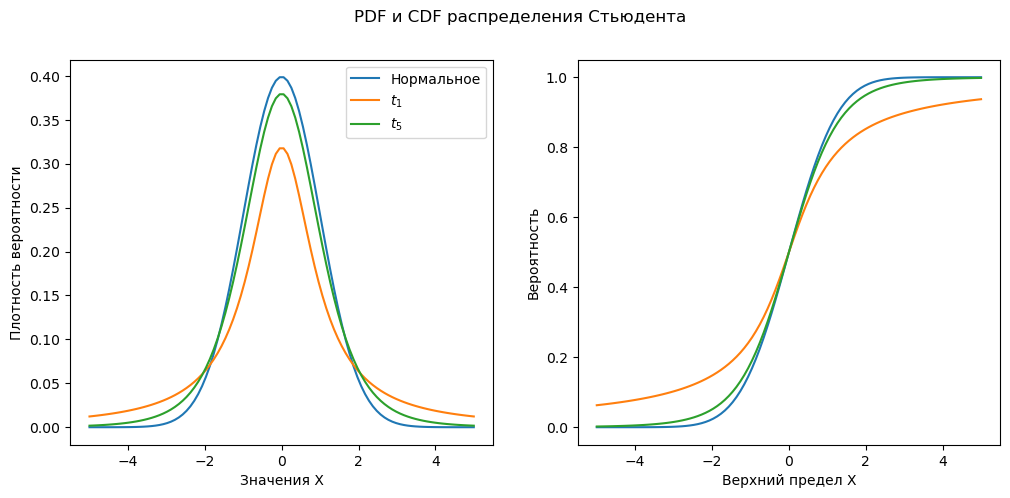

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
plt.suptitle('PDF и CDF распределения Стьюдента')
ax[0].set(xlabel = 'Значения X', ylabel = 'Плотность вероятности')
ax[1].set(xlabel = 'Верхний предел X', ylabel = 'Вероятность')

points = np.linspace(-5, 5, 100)
pdf1 = np.array([X1.pdf(x) for x in points])
ax[0].plot(points, pdf1);
pdf2 = np.array([X2.pdf(x) for x in points])
ax[0].plot(points, pdf2);
pdf3 = np.array([X3.pdf(x) for x in points])
ax[0].plot(points, pdf3);
ax[0].legend(['Нормальное', '$t_1$', '$t_5$'])

cdf1 = np.array([X1.cdf(x) for x in points])
ax[1].plot(points, cdf1);
cdf2 = np.array([X2.cdf(x) for x in points])
ax[1].plot(points, cdf2);
cdf3 = np.array([X3.cdf(x) for x in points])
ax[1].plot(points, cdf3);

Как видно, форма очень похожа на нормальную, но "хвосты" распредения тяжелее. У него один параметр - число степеней свободы, с ростом которого оно приближается к нормальному.

При достаточно большом $n$

$$
\sqrt{n}\frac{\bar X - \mu}{s} \sim t(n-1)
$$

#### Самостоятельная работа

Вычислите 95% доверительный интервал среднего для уже объявленной выборки X. Используйте вычисление выше как образец.
Вам понадобится `scipy.stats.t(n-1)`.

In [6]:
# Ваш код ниже:


Проверьте результат с помощью scipy:

In [48]:
st.t.interval(0.95, 99, loc=X.mean(), scale=st.sem(X))

(2.5217099329535886, 7.09194407871098)

### Bootstrap

Как построить доверительный интервал, если распределение оценки неизвестно?

In [8]:
X = np.random.exponential(1/2, 10000)

In [9]:
estimates = []
for i in range(1000):
    sample = np.random.choice(X, len(X))
    estimates.append(np.median(sample))

z005 = st.norm(0,1).ppf(1-0.05/2)
print(np.mean(estimates) - z005 * np.std(estimates, ddof=1), np.mean(estimates) + z005 * np.std(estimates, ddof=1))

0.33267686460192586 0.35208956093727256


In [10]:
np.median(X)

0.3419755405656676

In [11]:
st.expon(scale=1/2).median()

0.34657359027997264

#### Код для воспроизводимого параллельного бутстрепа

In [12]:
from joblib import Parallel, delayed

def bootstrap(func, X, estimator, iterations, random_state=177013, n_jobs=12):
    state = np.random.RandomState(random_state)
    estimates = Parallel(n_jobs)(delayed(func)(X, estimator, state) for i in range(iterations))
    result = st.norm(estimator(estimates), np.std(estimates, ddof=1)).interval(0.95)
    return result


def boot_classic(X, estimator, state):
    sample = state.choice(X, len(X))
    return estimator(sample)

def boot_bayes(X, estimator, state):
    w = np.random.dirichlet(np.ones(len(X)) * 4, 1)[0]
    sample = np.random.choice(X, len(X), p=w)
    return estimator(sample)

In [13]:
X = np.random.exponential(1/2, 10000)

In [14]:
bootstrap(boot_classic, X, np.median, 1000)

(0.34259340423928525, 0.35467239500380715)

In [15]:
bootstrap(boot_bayes, X, np.median, 1000)

(0.33727886050304107, 0.3557685091465734)

In [16]:
b = st.bootstrap((X,), np.median, confidence_level=0.95, n_resamples=1000, random_state=177013)

In [66]:
b.confidence_interval

ConfidenceInterval(low=0.3366017611327667, high=0.3538343708575081)

## Проверка статистических гипотез

Как формулируются гипотезы?

Гипотеза - то, что можно проверить с помощью наблюдений.

Прежде всего, нужна **нулевая гипотеза ($H_0$)** - гипотеза об отсутствии эффекта. Математически она описывается как равенство. *Отвергая* нулевую гипотезу, мы подтвердим эффект.

Например: "Средние двух распределений равны", "параметр распределения равен 0.5".

**Альтернативная гипотеза ($H_1$)** - гипотеза о наличии эффекта, о неравенстве. Она может быть как односторонней ("параметр больше 0.5"), так и двусторонней ("средние выборок не равны").

После формулировки гипотез следует определиться с **уровнем значимости $\alpha$**. Он соответствует наибольшей вероятности **ошибки первого рода** (ложноположительного срабатывания, обнаружения эффекта там, где его нет), другими словами, того, что мы отвергнем верную нулевую гипотезу.

Третьим этапом определяется **статистический критерий** - какая-то статистика выборки и соответствующие ей *критические области*. При подадании значения статистики в эти области мы отвергаем нулевую гипотезу.

### Z-тест для среднего

Положим, есть некое распределение, для которого мы знаем дисперсию $\sigma^2$, но среднее $\mu$ можем только оценить.

Определим гипотезы так:

$$
H_0: \mu = \mu_0 \\
H_1: \mu \neq \mu_0
$$

Тогда чем ближе $\mu_0$ к истине, тем меньше $\bar X - \mu_0$, а мы помним, что

$$
\sqrt{n}\frac{\bar X - \mu_0}{\sigma}
$$

стремится распределиться нормально.

То есть критические значения соответствуют $PPF_Z(1 - \alpha)$, что для двустороннего теста выглядит так:

$$
\left|\sqrt{n}\frac{\bar X - \mu_0}{\sigma}\right| \geqslant z_{\alpha/2}
$$

В этих областях мы отвергаем нулевую гипотезу.

Как видим, принцип очень похож на тот, что мы использовали для построения доверительного интервала. Действительно, отвергнуть нулевую гипотезу - это то же самое, что сказать "$\mu_0$ не попадает в соответствующий доверительный интервал для $\mu$". 

Аналогично для одностороннего теста:

$$
H_1: \mu > \mu_0 : \text{отвергаем }H_0\text{, если статистика}\geqslant z_{\alpha}\\
H_1: \mu < \mu_0 : \text{отвергаем }H_0\text{, если статистика}\leqslant -z_{\alpha}
$$

### T-тест для среднего

Все то же самое, если мы не знаем дисперсию: используем распределение Стьюдента.

Критерий:
$$
\sqrt{n}\frac{\bar X - \mu_0}{S}
$$

Критические значения^ $\pm t(n-1)_{\alpha/2}\text{ или}\pm t(n-1)_{\alpha}$ для односторонних тестов.

### P-value

На практике проще проверять не вхождение в интервал, а *вероятность получить данное или более экстремальное значение критерия, если нулевая гипотеза верна*. Если оно меньше порога $\alpha$, то нулевая гипотеза отвергается.

In [18]:
X = np.random.poisson(2, 100)

alpha = 0.05

In [19]:
criterion_value, p_value = st.ttest_1samp(X, 1)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 3.32591046185252e-15
Отвергаем нулевую гипотезу.


**Для одностороннего теста достаточно разделить P-value на 2, а больше/меньше видно по выборочным средним.**

### A/B тестирование

#### Z-критерий для двух выборок:

$$
\large{\frac{\bar X - \bar Y}{\sqrt{\frac{\sigma^2_x}{n_x}+\frac{\sigma^2_y}{n_y}}}}
$$

#### Т-критерий для двух выборок:

$$
\large{\frac{\bar X - \bar Y}{\sqrt{\frac{s^2}{n_x}+\frac{s^2}{n_y}}}}
$$

Где $s$ считается по выборочной дисперсии:

$$
s = \sqrt{\frac{(n_x-1)s^2_x + (n_y-1)s^2_y}{n_x+n_y-2}}
$$

А число степеней свободы будет $n_x+n_y-2$.

#### Т-тест Уэлча
Если у распределений разные дисперсии, то формула упрощается:

$$
\large{\frac{\bar X - \bar Y}{\sqrt{\frac{s^2_x}{n_x}+\frac{s^2_y}{n_y}}}}
$$

А число степеней свободы в простейшем случае можно брать как $min{(n_x, n_y)} -1$ (но есть и более сложные методы).

Этот тест рекомендуется использовать по умолчанию.

In [68]:
X = np.random.poisson(2, 100)
Y = np.random.poisson(2.5, 100)
Y

array([6, 2, 1, 3, 5, 4, 1, 5, 2, 5, 3, 2, 2, 2, 2, 3, 1, 3, 4, 4, 1, 0,
       1, 2, 3, 2, 0, 3, 2, 5, 3, 5, 5, 0, 2, 2, 0, 2, 0, 2, 3, 2, 2, 3,
       5, 4, 3, 4, 3, 2, 1, 3, 1, 2, 4, 5, 4, 2, 0, 2, 3, 3, 0, 6, 5, 3,
       3, 4, 1, 4, 5, 2, 2, 5, 3, 1, 4, 3, 3, 1, 3, 4, 4, 2, 2, 0, 1, 2,
       2, 2, 3, 3, 0, 3, 3, 5, 1, 4, 5, 2])

In [21]:
criterion_value, p_value = st.ttest_ind(X, Y, equal_var=False)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 0.022209890700296678
Отвергаем нулевую гипотезу.


### Тест для зависимых выборок

In [22]:
before = np.random.poisson(2, 100)
after = np.random.poisson(2.5, 100)

In [23]:
criterion_value, p_value = st.ttest_rel(before, after)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 0.02055236899502758
Отвергаем нулевую гипотезу.


### Допущения и свойства параметрических тестов

- Z-тест и Т-тест опираются на ЦПТ. Выборка должна быть достаточно большой (или маленькой, но нормально распределенной).
- Как следствие, выбросы также сильно влияют на надежность тестов.

**Ошибка первого рода**, как мы уже говорили, - вероятность отвергнуть верную нулевую гипотезу. **Ошибка второго рода**, соответственно, - когда нам не удалось отвергнуть неверную нулевую гипотезу (то есть мы не обнаружили эффект там, где он есть). Верхний предел на них обозначается $\alpha$ и $\beta$.

**Статистической мощностью теста** называется вероятность обнаружить эффект, когда он присутствует ($1-\beta$).

**Минимальный размер эффекта** для А/B теста - это минимальное различие между двумя статистиками, которое тест можзет обнаружить. От него зависит минимальный нужный размер выборки.

Для одностороннего Т-теста это:

$$
n \geqslant \left(\frac{(z_a+z_b)^2}{MDE}(s^2_x+s^2_y)\right)
$$

Для двустороннего:

$$
n \geqslant \left(\frac{(z_{a/2}+z_b)^2}{MDE}(s^2_x+s^2_y)\right)
$$

### Непараметрические тесты

Непараметрические тесты стоит применять, если:

- выборка мала;
- нет возможности удалить выбросы и/или медианные значения важнее средних.

Непараметрические тесты сортируют и ранжируют значения после какой-то обработки. Эти ранги и используются для подсчета критерия. Они используют лишь значения выборок и их количество. Для них не важны параметры распределения. 

#### U-тест Манна-Уитни

Его можно рассматривать как непараметрический аналог Т-теста для независимых выборок. Он проверяет гипотезу о равенстве распределений.

In [24]:
criterion_value, p_value = st.mannwhitneyu(X, Y)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 0.03251531883660863
Отвергаем нулевую гипотезу.


#### W-тест Уилкоксона

Его можно рассматривать как непараметрический аналог Т-теста для зависимых выборок. Он проверяет гипотезу о симметричности распределения разности относительно нуля.

In [25]:
criterion_value, p_value = st.wilcoxon(before, after)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 0.0076404204253243
Отвергаем нулевую гипотезу.


#### Тест Муда на равенство медиан

In [26]:
X = np.random.poisson(1, 100)
Y = np.random.poisson(1.4, 100)

In [27]:
criterion_value, p_value, grand_median, _ = st.median_test(X, Y)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 0.010574224306144775
Отвергаем нулевую гипотезу.


#### Тесты на нормальность

In [28]:
X = np.random.normal(5, 10, 100) + np.random.uniform(-1, 1, 100)

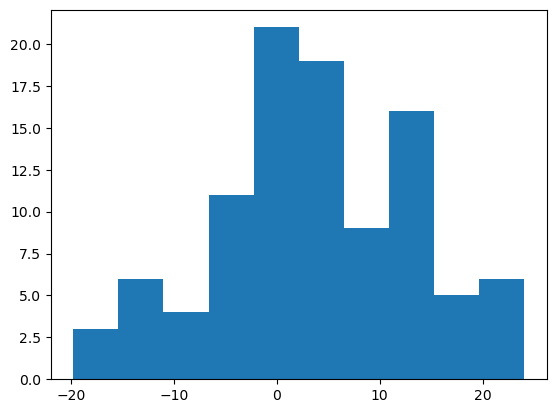

In [29]:
plt.hist(X);

Тест Шапиро-Уилка (неплохо работает с малыми выборками):

In [30]:
criterion_value, p_value, = st.shapiro(X)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 0.6068897247314453
Не удается опровергнуть нулевую гипотезу.


Тест Андерсона-Дарлинга позволяет протестировать разные формы распределений по критическим значениям (образает особое внимание на хвосты):

In [31]:
criterion_value, critical_value, levels = st.anderson(X, dist='norm')

print(f'Результат: {criterion_value}')
print(f'Критические значения {critical_value}')
print(f'Уровни достоверности, % {levels}')

Результат: 0.25544858091231504
Критические значения [0.555 0.632 0.759 0.885 1.053]
Уровни достоверности, % [15.  10.   5.   2.5  1. ]


Тест Колмогорова-Смирнова тестирует на качество попадания в любое распределение по оценке CDF (чувствителен и к среднему, и к дисперсии):

In [32]:
criterion_value, p_value = st.kstest(X, st.norm(5, 10).cdf)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 0.3116598100884639
Не удается опровергнуть нулевую гипотезу.


### Другие полезные тесты

#### Тесты на равенство дисперсий

In [33]:
X = np.random.normal(5, 10, 100) + np.random.uniform(-10, 10, 100)
Y = np.random.normal(5, 10, 100)

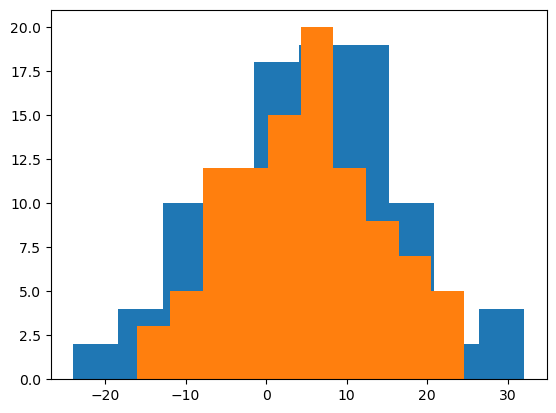

In [34]:
plt.hist(X);
plt.hist(Y);

In [35]:
criterion_value, p_value = st.bartlett(X, Y)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 0.014132222267238433
Отвергаем нулевую гипотезу.


In [36]:
criterion_value, p_value = st.levene(X, Y)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 0.019289643034653466
Отвергаем нулевую гипотезу.


# Домашнее задание

Вернемся к датасету клиентов банка.

In [41]:
import pandas as pd

In [42]:
df = pd.read_csv('Churn_Modelling.csv')

In [53]:
loyal = df.query('Exited == 0')['CreditScore'] #.head()
exited = df.query('Exited == 1')['CreditScore'] #.head()

In [60]:
#df['CreditScore'].describe() 
loyal

1       608
3       699
4       850
6       822
8       501
       ... 
9993    644
9994    800
9995    771
9996    516
9999    792
Name: CreditScore, Length: 7963, dtype: int64

In [ ]:
df

## Easy

Вычислите двусторонние 95% доверительные интервалы для среднего по столбцу `CreditScore` в выборках `loyal` и `exited`, сделанных выше.

In [61]:
# Ваш код ниже:
st.t.interval(alpha=0.95, df=len(loyal)-1, loc=np.mean(loyal), scale=st.sem(loyal))


C:\Users\Owner\AppData\Local\Temp\ipykernel_21080\1492334231.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(loyal)-1, loc=np.mean(loyal), scale=st.sem(loyal))


(649.7519439611135, 653.9544481021792)

In [62]:

st.t.interval(alpha=0.95, df=len(exited)-1, loc=np.mean(exited), scale=st.sem(exited))

C:\Users\Owner\AppData\Local\Temp\ipykernel_21080\2009969290.py:1: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  st.t.interval(alpha=0.95, df=len(exited)-1, loc=np.mean(exited), scale=st.sem(exited))


(640.9923167281111, 649.7106778717907)

## Normal

Завершите исследование: проведите тесты на равенство средних в выборках `loyal` и `exited` по следующим столбцам:
- `CreditScore`
- `Age`
- `Tenure`

Примите уровень достоверности в 5%.

In [69]:
# Ваш код ниже:
alpha = 0.05
criterion_value, p_value = st.ttest_1samp(loyal, 1)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 0.0
Отвергаем нулевую гипотезу.


In [70]:
alpha = 0.05
criterion_value, p_value = st.ttest_1samp(exited, 1)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 0.0
Отвергаем нулевую гипотезу.


In [71]:
loyal_Age = df.query('Exited == 0')['Age'] #.head()
exited_Age = df.query('Exited == 1')['Age'] #.head()
criterion_value, p_value = st.ttest_1samp(loyal_Age, 1)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 0.0
Отвергаем нулевую гипотезу.


In [72]:
criterion_value, p_value = st.ttest_1samp(exited_Age, 1)

print(f'P-value {p_value}')
if p_value < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не удается опровергнуть нулевую гипотезу.')

P-value 0.0
Отвергаем нулевую гипотезу.


Напишите краткий вывод:


# Hard

Вычислите одностороннний 95% доверительный интервал (в большую сторону) для минимума по столбцу `EstimatedSalary` методом bootstrap.

In [64]:
X = df['EstimatedSalary']
X

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

In [65]:
# Ваш код ниже:
estimates = []
for i in range(1000):
    sample = np.random.choice(X, len(X))
    estimates.append(np.min(sample))

z005 = st.norm(0,1).ppf(1-0.05/2)
print(np.mean(estimates) - z005 * np.std(estimates, ddof=1), np.mean(estimates) + z005 * np.std(estimates, ddof=1))

-35.778459390895215 118.33897939089522
